# Smoothing matrix with gaussian filter

CoolBox support smoothing the Hi-C contact matrix with gaussian filter.

In [1]:
import coolbox
from coolbox.api import *

In [2]:
coolbox.__version__

'0.2.5'

In [3]:
test_hic = "../../../tests/test_data/test.hic"
test_interval = "chr9:4000000-6000000"

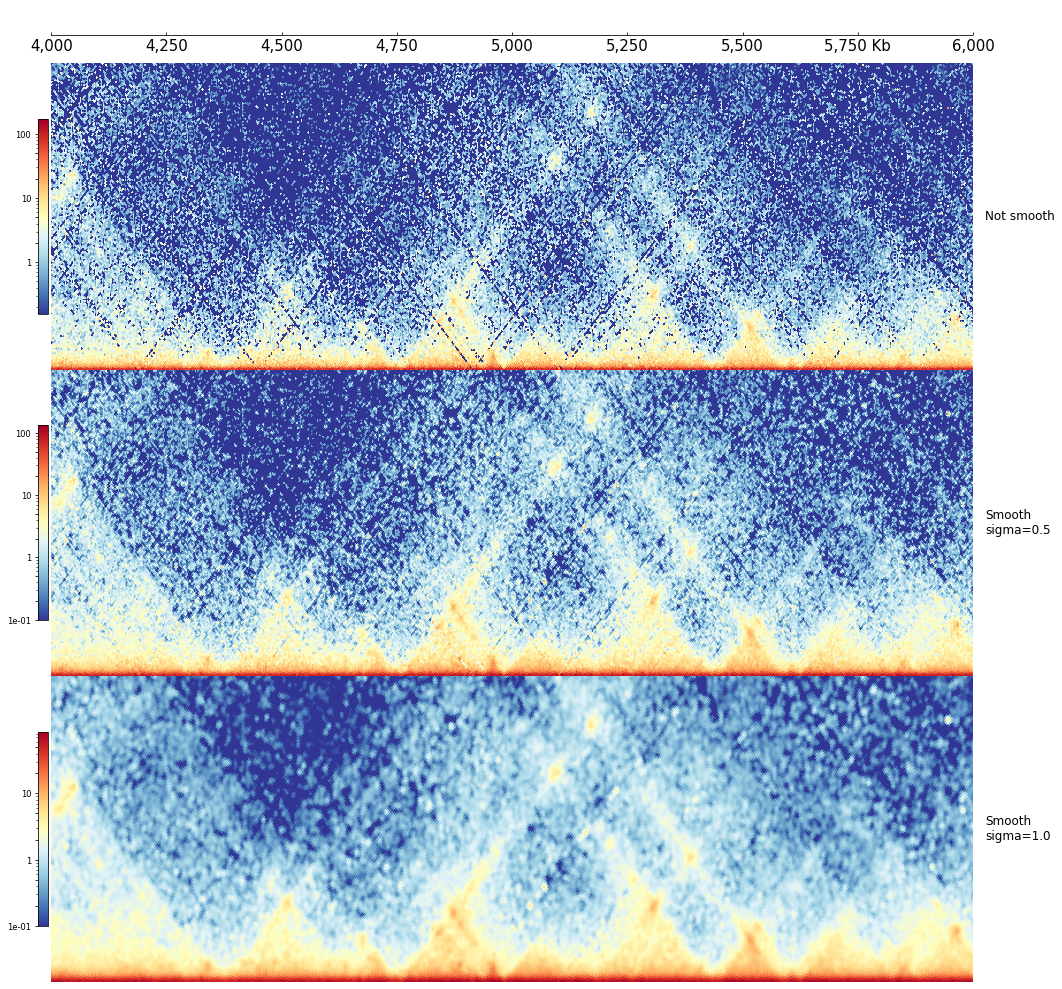

In [4]:
with Color("RdYlBu_r"), Feature("depth_ratio", 0.5):
    raw = DotHiC(test_hic) + Title("Not smooth")
    smo0 = DotHiC(test_hic, gaussian_sigma=0.5) + MinValue(1e-1) + Title("Smooth\nsigma=0.5")
    smo1 = DotHiC(test_hic, gaussian_sigma=1) + MinValue(1e-1) + Title("Smooth\nsigma=1.0")

frame = XAxis() + raw + smo0 + smo1
frame.plot(test_interval)

### CLI code

In [5]:
%%bash

test_hic="../../../tests/test_data/test.hic"

coolbox add XAxis - \
    start_with Color "RdYlBu_r" - \
    start_with Feature "depth_ratio" "0.5" - \
    add DotHiC $test_hic - add Title "Not smooth" - \
    add DotHiC $test_hic --gaussian_sigma "0.5" --min_value "1e-1" - \
    add Title 'Smooth sigma=0.5' - \
    add DotHiC $test_hic --gaussian_sigma "1.0" --min_value "1e-1" - \
    add Title 'Smooth sigma=1.0' - \
    end_with - \
    end_with - \
    goto "chr9:4000000-6000000" - \
    plot /tmp/test_coolbox_smooth.png